<a href="https://colab.research.google.com/github/arponmandal/Image-classification/blob/main/ethnicity_prediction_with_human_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

 0ef094cf-b75e-4471-a788-366e95866082-151218142617.gdoc
 0ef094cf-b75e-4471-a788-366e95866082-151218142617.pdf
 1111.gdoc
 183-15-11861_E_Eco.pdf
 183-15-11861_E_Q1.gdoc
 2.-Online_Exam_Response_Submission_Template_Spring-2021-2.gdoc
 accounting-math.gdoc
 cao.gdoc
'CAO presentation. (1).gdoc'
'CAO presentation. (1).pdf'
 Classroom
'Colab Notebooks'
 CSE334-E-183-15-11861-Mid.gdoc
 dfrtghfde.gdoc
'eco-converted (1).gslides'
'eco-converted (2).gslides'
 eco-converted.gslides
 fe461dcf55d5ce5f5b887a07761d58e5.gslides
'final doc.gdoc'
 GDToT
'gfhjhfr 20150517_173134.jpg'
 haha_paper1.gdoc
'How to get started with Drive.pdf'
'Mini Dataset'
'New Doc.jpg'
 P064.gdoc
'Portfolio (1).gsite'
'Portfolio (2).gsite'
 Portfolio.gsite
'Project (1).gsite'
 Project.gsite
'Prototyping presentation.gslides'
'Pushpa The Rise (2021) 1080p AMZN WEBRip x265 Hindi DDP5.1 ESub - SP3LL.mkv'
'Student Portfolio.gsite'
 sw_P064.gdoc
'Title defense topics.gdoc'
'Trends in AI.gdoc'
'Untitled document (1).gdoc'
'Unti

In [3]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

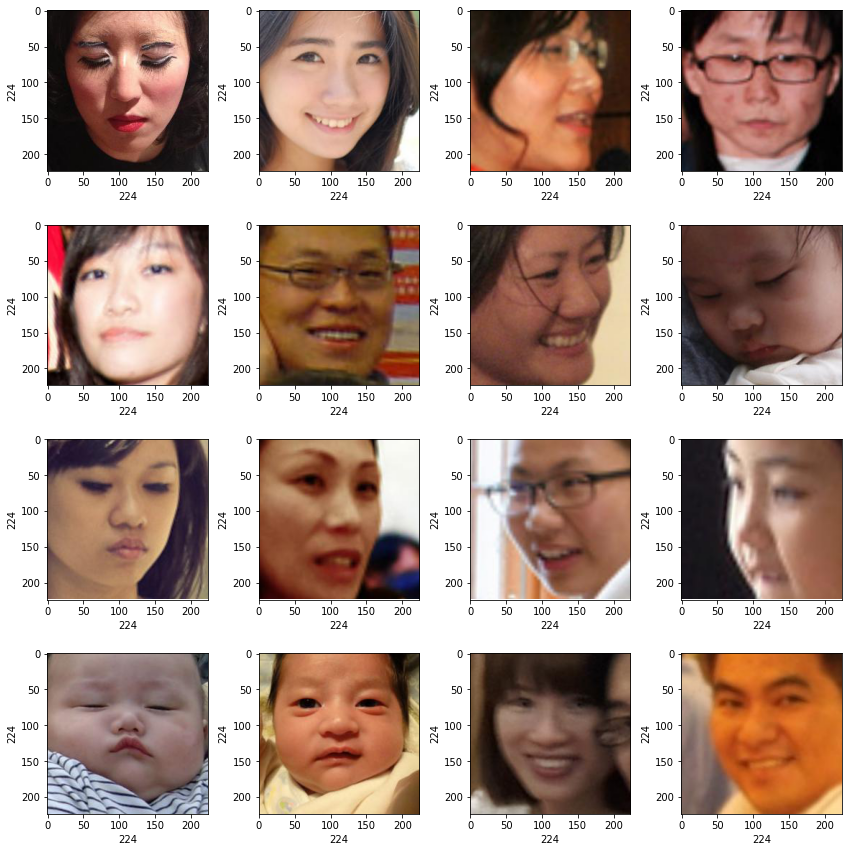

In [4]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Mini Dataset/East Asian"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [5]:
# Setting path and creating empty list
dir = "/content/drive/MyDrive/Mini Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [6]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [7]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

East Asian         1000
Indian             1000
Southeast Asian    1000
dtype: int64

In [8]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

3

In [9]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [10]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(3000,)

In [11]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [12]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

In [13]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['East Asian' 'Indian' 'Southeast Asian']


In [14]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [15]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [16]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [18]:
# Training the model
epochs = 200
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/200
15/15 [==============================] - 3s 138ms/step - loss: 1.0985 - accuracy: 0.3703 - val_loss: 1.0943 - val_accuracy: 0.3729
Epoch 2/200
15/15 [==============================] - 1s 93ms/step - loss: 1.0873 - accuracy: 0.3828 - val_loss: 1.0869 - val_accuracy: 0.3417
Epoch 3/200
15/15 [==============================] - 1s 93ms/step - loss: 1.0754 - accuracy: 0.4000 - val_loss: 1.0711 - val_accuracy: 0.3812
Epoch 4/200
15/15 [==============================] - 1s 93ms/step - loss: 1.0589 - accuracy: 0.4354 - val_loss: 1.0506 - val_accuracy: 0.4250
Epoch 5/200
15/15 [==============================] - 1s 93ms/step - loss: 1.0455 - accuracy: 0.4479 - val_loss: 1.0325 - val_accuracy: 0.4708
Epoch 6/200
15/15 [==============================] - 1s 94ms/step - loss: 1.0124 - accuracy: 0.5245 - val_loss: 1.0313 - val_accuracy: 0.4375
Epoch 7/200
15/15 [==============================] - 1s 94ms/step - loss: 1.0144 - accuracy: 0.4792 - val_loss: 0.9936 - val_accuracy: 0.5167
Epoch

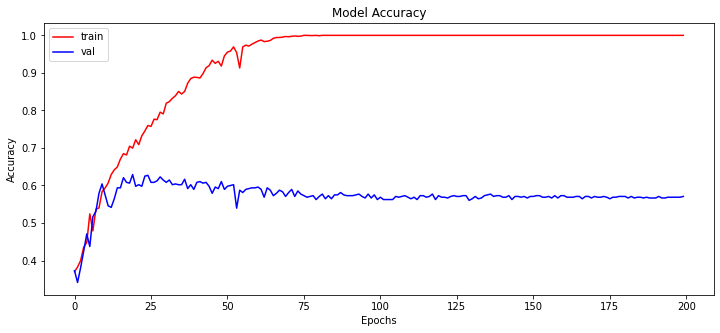

In [19]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

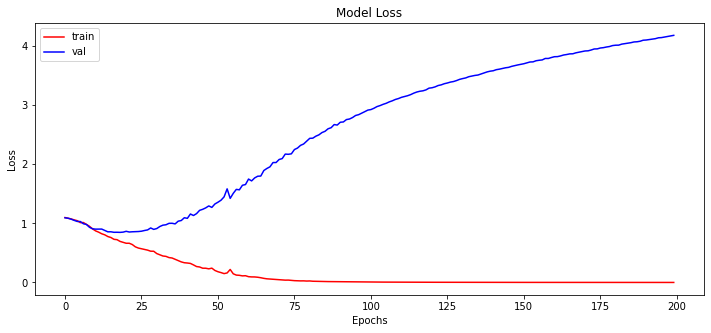

In [20]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [21]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 1s 19ms/step - loss: 4.0828 - accuracy: 0.5717
Test Accuracy: 57.16666579246521


In [22]:
# Storing predictions
y_pred = model.predict(x_test)

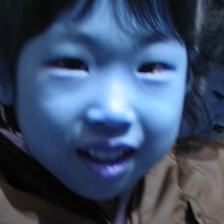

In [27]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [28]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[10])])
print("Predicted : ",labels[np.argmax(y_pred[10])])

['East Asian' 'Indian' 'Southeast Asian']
Originally :  East Asian
Predicted :  East Asian
